# Analysis of the StevenTime dataset


In [32]:
import pandas as pd
import numpy as np

# Define the path to the file
file_path = 'steventime.csv'

# Load the dataset with no header initially and then assign column names
column_names = ['Timestamp', 'DriveTime']
data = pd.read_csv(file_path, names=column_names, header=None)

# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Attempt to convert 'DriveTime' to numeric, replace non-numeric values with NaN
data['DriveTime'] = pd.to_numeric(data['DriveTime'], errors='coerce')

# Fill NaN values with the median drive time and convert to integers
median_drive_time = data['DriveTime'].median()
data['DriveTime'].fillna(median_drive_time, inplace=True)
data['DriveTime'] = data['DriveTime'].astype(int)

# The dataset is now ready for analysis
print(data.head())



            Timestamp  DriveTime
0 2023-11-26 15:00:49         88
1 2023-11-26 15:09:42         88
2 2023-11-26 15:12:24         88
3 2023-11-27 06:23:15         95
4 2023-11-27 14:30:11         93


/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/3013945113.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DriveTime'].fillna(median_drive_time, inplace=True)


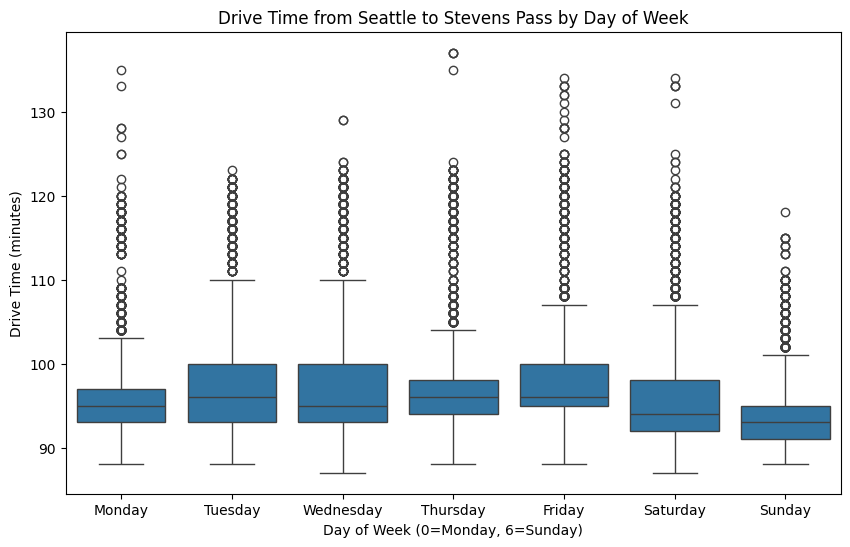

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the day of the week
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a box-and-whisker plot
sns.boxplot(x='DayOfWeek', y='DriveTime', data=data)

# Set plot titles and labels
plt.title('Drive Time from Seattle to Stevens Pass by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Drive Time (minutes)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()


/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/1486731546.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='DriveTime', data=data[data['YearMonth'] == year_month], ax=ax, palette="vlag")
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/1486731546.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/1486731546.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='DriveTime', data=data[data['Y

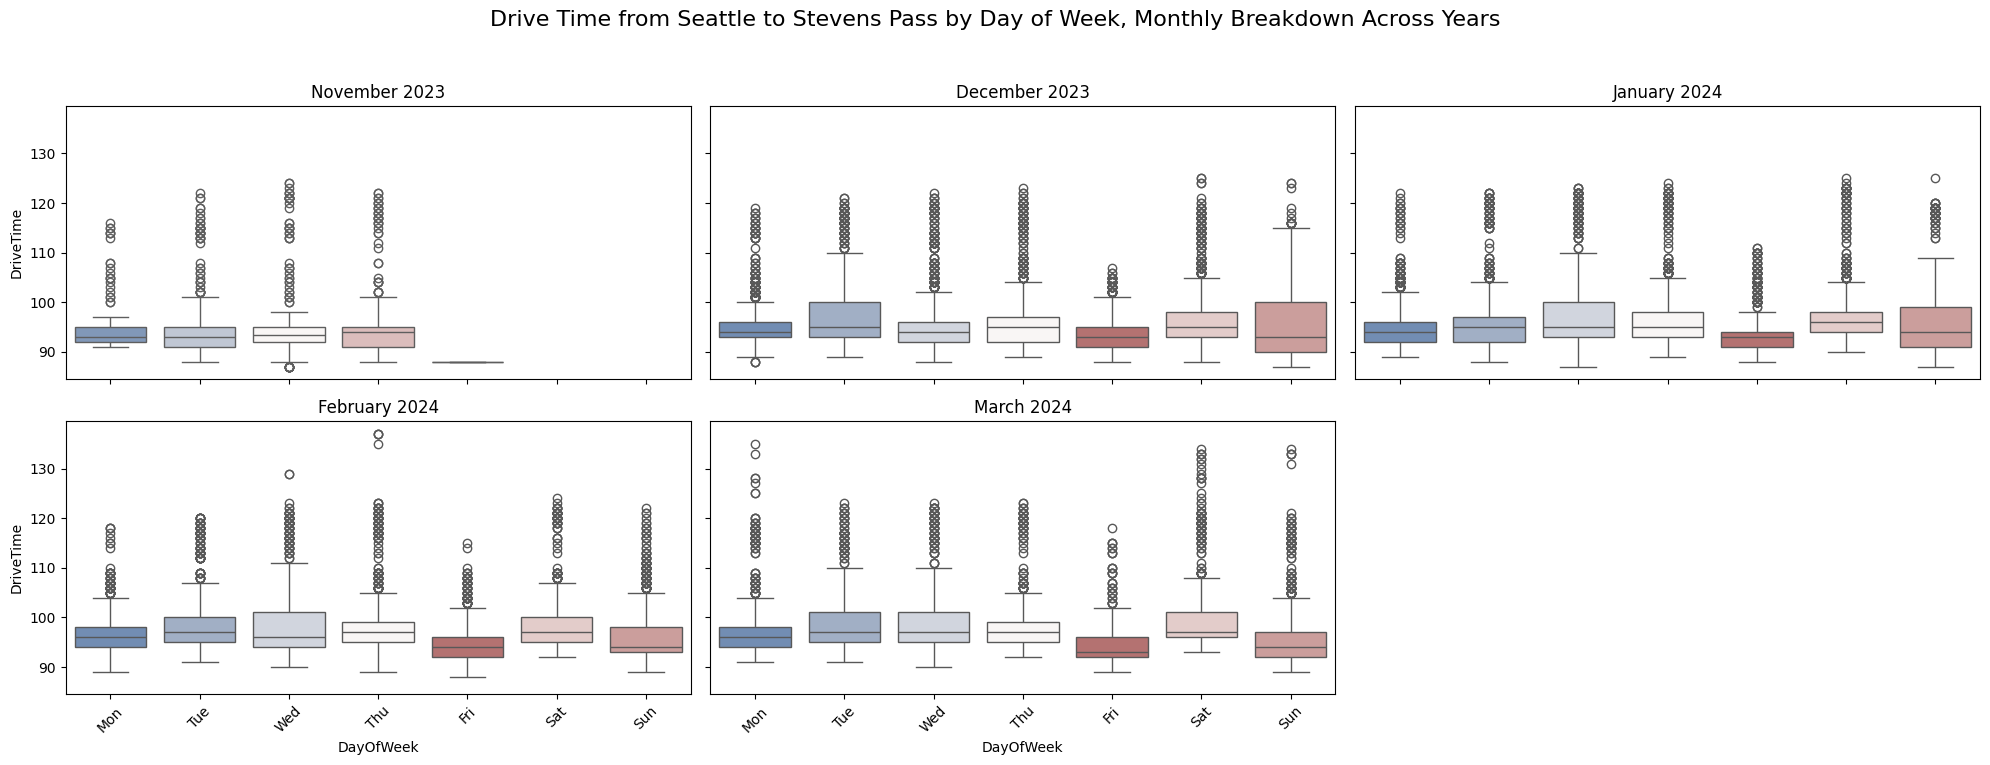

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame after initial processing
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

# Determine unique year-month combinations and sort them
unique_year_months = data['YearMonth'].unique()
unique_year_months = sorted(unique_year_months, key=lambda x: (x.year, x.month))

# Prepare the figure layout dynamically based on the number of unique year-month combinations
n_plots = len(unique_year_months)
n_rows = n_plots // 3 + (n_plots % 3 > 0)  # Calculate rows needed for subplots

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(20, n_rows * 4), sharex=True, sharey=True)
fig.suptitle('Drive Time from Seattle to Stevens Pass by Day of Week, Monthly Breakdown Across Years', fontsize=16)

# Dictionary to convert month numbers to names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

for i, year_month in enumerate(unique_year_months):
    ax = axes.flatten()[i]
    sns.boxplot(x='DayOfWeek', y='DriveTime', data=data[data['YearMonth'] == year_month], ax=ax, palette="vlag")
    # Use the '.month' attribute and '.year' directly from the Period object
    month_name = month_names[year_month.month]
    ax.set_title(f'{month_name} {year_month.year}')
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

# Hide any unused subplot areas if they exist
for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


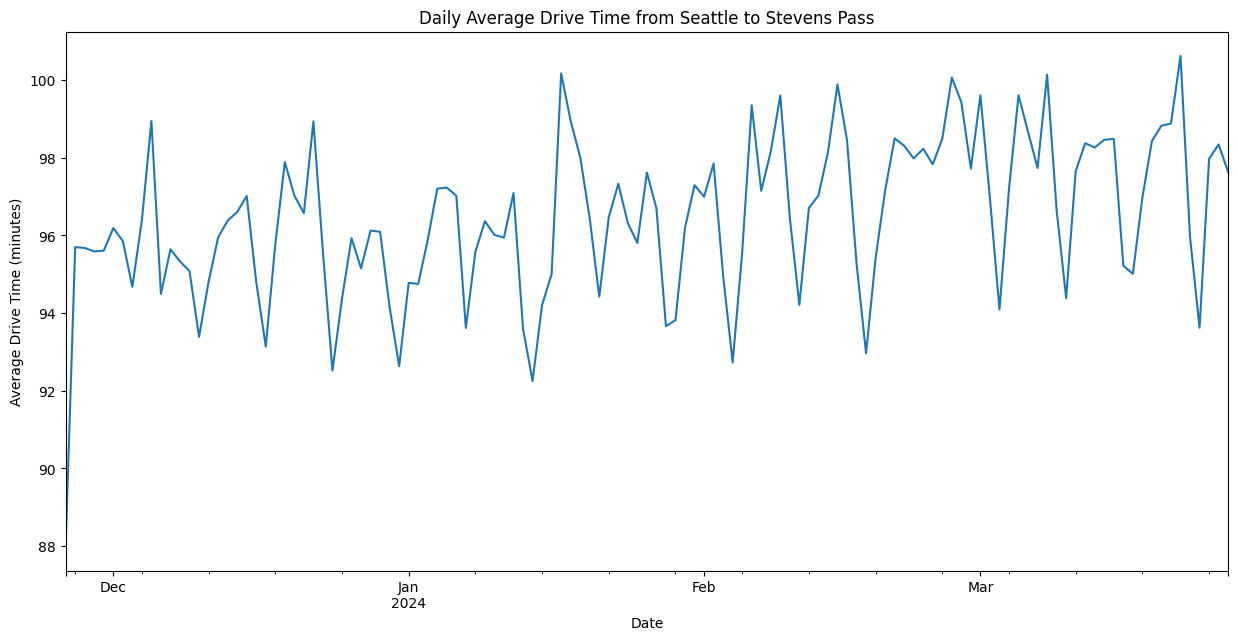

In [35]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame that includes the 'Timestamp' and 'DriveTime' columns

# Convert 'Timestamp' to datetime if not already done
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the DataFrame index
data.set_index('Timestamp', inplace=True)

# Aggregate data to daily average drive time
daily_avg_drive_time = data['DriveTime'].resample('D').mean()

# Plotting the daily average drive time
plt.figure(figsize=(15, 7))
daily_avg_drive_time.plot(title='Daily Average Drive Time from Seattle to Stevens Pass')
plt.xlabel('Date')
plt.ylabel('Average Drive Time (minutes)')
plt.show()


In [36]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(daily_avg_drive_time.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret p-value
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -0.852500
p-value: 0.803212
The series is not stationary.


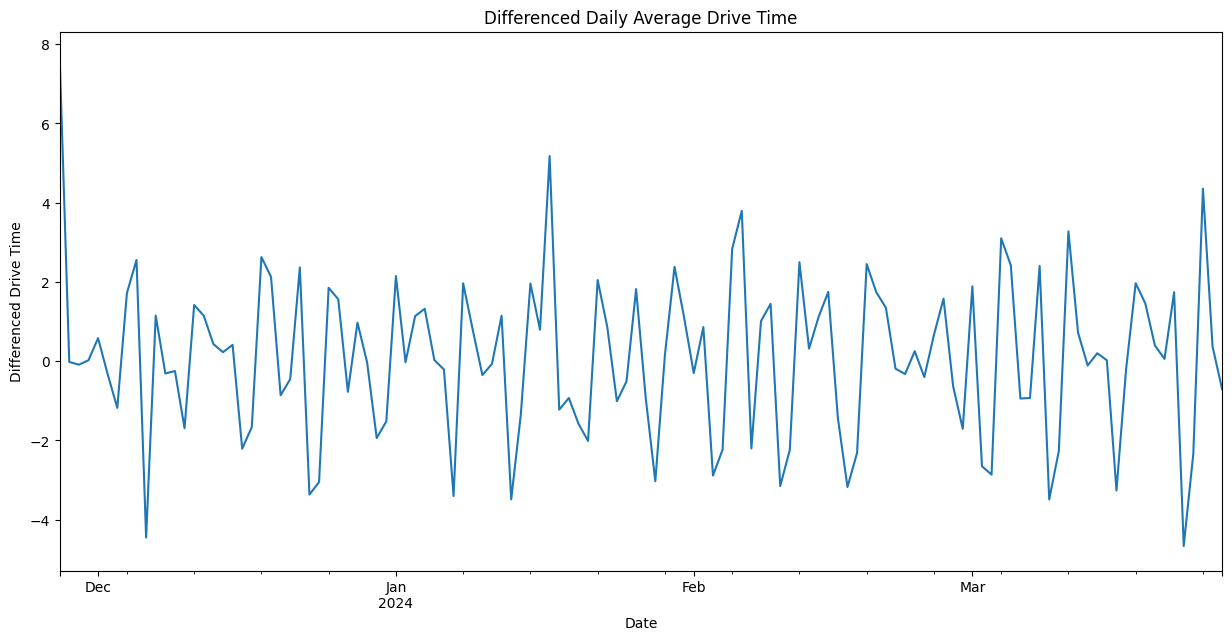

ADF Statistic: -7.512477
p-value: 0.000000
The differenced series is stationary.


In [37]:
# My p-value is too great, I am going to try differenceing the data
# Differencing the series
daily_avg_drive_time_diff = daily_avg_drive_time.diff().dropna()

# Plotting the differenced data
plt.figure(figsize=(15, 7))
daily_avg_drive_time_diff.plot(title='Differenced Daily Average Drive Time')
plt.xlabel('Date')
plt.ylabel('Differenced Drive Time')
plt.show()

# Perform the ADF test again on the differenced data
result_diff = adfuller(daily_avg_drive_time_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

# Interpret p-value
if result_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is not stationary.")


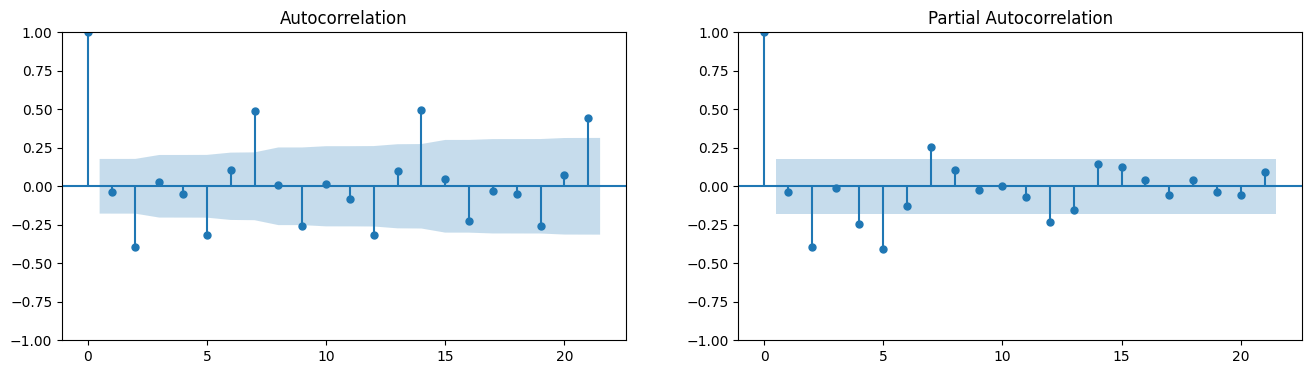

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(daily_avg_drive_time_diff, ax=ax1)
plot_pacf(daily_avg_drive_time_diff, ax=ax2)

plt.show()


In [39]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # AR order
q = 1  # MA order

# Example: ARIMA model with p, d, q
model = ARIMA(daily_avg_drive_time, order=(p, 1, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting future values
forecasts = model_fit.forecast(steps=5)  # For example, forecasting the next 5 days
print(forecasts)


                               SARIMAX Results                                
Dep. Variable:              DriveTime   No. Observations:                  123
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -244.014
Date:                Fri, 29 Mar 2024   AIC                            494.029
Time:                        13:27:47   BIC                            502.441
Sample:                    11-26-2023   HQIC                           497.445
                         - 03-27-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3926      0.104      3.766      0.000       0.188       0.597
ma.L1         -0.9467      0.037    -25.489      0.000      -1.020      -0.874
sigma2         3.1583      0.376      8.398      0.0

In [40]:
print(data.columns)


Index(['DriveTime', 'DayOfWeek', 'YearMonth'], dtype='object')


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
X = data.drop('DriveTime', axis=1)  # Features

# Convert 'YearMonth' to a string and then label encode it
le = LabelEncoder()
X['YearMonth'] = le.fit_transform(X['YearMonth'].astype(str))

y = data['DriveTime']  # Target

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 4.154995107427499


In [42]:
# Manually prepare features for March 30
features_for_march_30 = {
    'DayOfWeek': 5,  # Assuming Saturday is encoded as 5
    # Add other features here as necessary
}

# If 'YearMonth' was label encoded as part of your feature engineering,
# you need to apply the same encoding here:
# Assuming you have the encoder saved, or you know the encoded value for March 2024:
encoded_yearmonth_march_2024 = le.transform(['2024-03'])[0]  # Example
features_for_march_30['YearMonth'] = encoded_yearmonth_march_2024

# Convert the features dictionary to a DataFrame row, as expected by the model
features_df = pd.DataFrame([features_for_march_30])


In [43]:
# Make the prediction for March 30
predicted_drive_time = model.predict(features_df)[0]
print(f"Predicted Drive Time for March 30: {predicted_drive_time} minutes")


Predicted Drive Time for March 30: 96.95958745854341 minutes


/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/3689618004.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2024-03-30 05:00", end="2024-03-30 22:00", freq='15T')


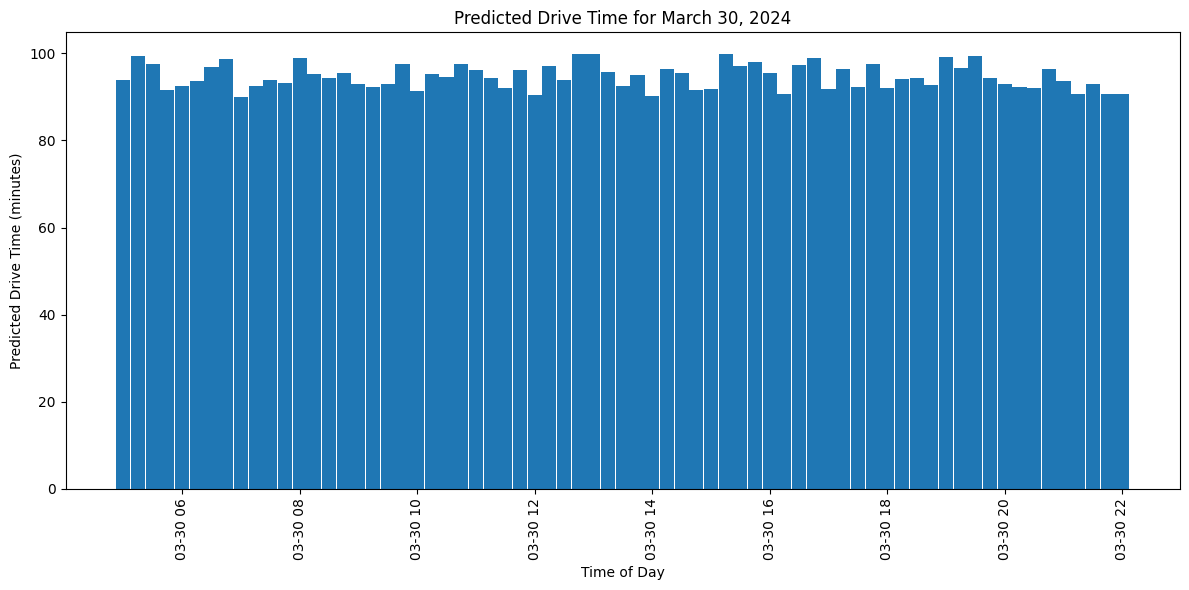

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range for March 30, 5 AM to 10 PM, in 15-minute increments
timestamps = pd.date_range(start="2024-03-30 05:00", end="2024-03-30 22:00", freq='15T')

# Assuming DayOfWeek and YearMonth are your features
day_of_week = 5  # For Saturday
# Use the previously fitted LabelEncoder to transform 'YearMonth'
year_month_encoded = le.transform(['2024-03'])[0]

# Assuming a simplified case where we just use these features without the exact time of day
features = pd.DataFrame({
    'DayOfWeek': day_of_week,
    'YearMonth': year_month_encoded
}, index=timestamps)

# Normally, you'd have a way to include time of day as a feature here

# Mock predictions (replace with your model predictions)
# predictions = model.predict(features)
predictions = np.random.rand(len(timestamps)) * 10 + 90  # Example predictions

plt.figure(figsize=(12, 6))
plt.bar(timestamps, predictions, width=0.01)
plt.xlabel('Time of Day')
plt.ylabel('Predicted Drive Time (minutes)')
plt.title('Predicted Drive Time for March 30, 2024')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


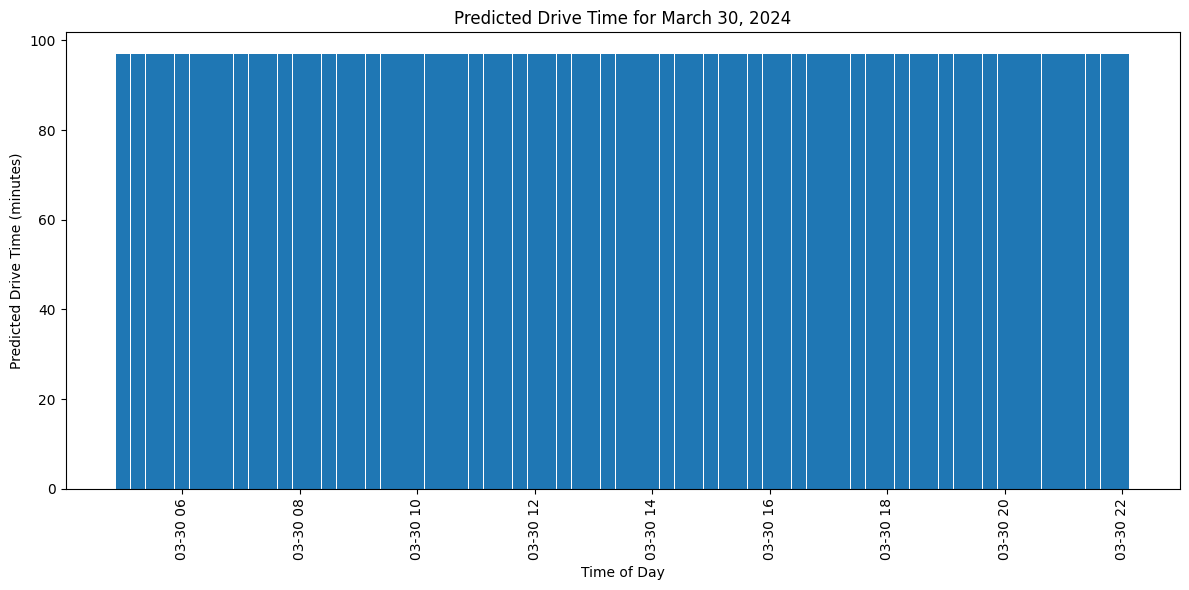

In [45]:
# Determine the encoded value for March 2024
march_2024_encoded = le.transform(['2024-03'])[0]

# Prepare the features for March 30, 2024
features_march_30 = pd.DataFrame({
    'DayOfWeek': [5] * len(timestamps),  # 5 represents Saturday
    'YearMonth': [march_2024_encoded] * len(timestamps)  # Encoded value for March 2024
}, index=timestamps)

# Predict using the model
# This step assumes each timestamp could yield a different prediction, which is not the case here
predictions_march_30 = model.predict(features_march_30)

plt.figure(figsize=(12, 6))
# Since predictions won't actually vary by time, this plot will look uniform
plt.bar(timestamps, predictions_march_30, width=0.01)
plt.xlabel('Time of Day')
plt.ylabel('Predicted Drive Time (minutes)')
plt.title('Predicted Drive Time for March 30, 2024')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
